# **Assignment 4.1: Mood Detection**

In [3]:
import os
from glob import glob
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from PIL import Image
import sys

data_path = "image_classes/train/"
data = []
labels = []
paths = []

# iterate through the dataset
for class_name in os.listdir(data_path):
    class_dir = os.path.join(data_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        paths.append(img_path)
        img = cv.imread(img_path) 
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        data.append(img)
        labels.append(class_name)

In [5]:
data_path = "image_classes/test/"

for class_name in os.listdir(data_path):
    class_dir = os.path.join(data_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        paths.append(img_path)
        img = cv.imread(img_path)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        data.append(img)
        labels.append(class_name)

### Create dataframe based on created data and labels

In [6]:
df = pd.DataFrame({'data' : paths, 'label' : labels})
data = np.array(data)
labels = np.array(labels)

In [7]:
df.loc[df.label == 'confused']

,data,label
70,image_classes/train/confused\confused_100 resi...,confused
71,image_classes/train/confused\confused_31 resiz...,confused
72,image_classes/train/confused\confused_32 resiz...,confused
73,image_classes/train/confused\confused_33 resiz...,confused
74,image_classes/train/confused\confused_34 resiz...,confused
...,...,...
335,image_classes/test/confused\confused_5 resized...,confused
336,image_classes/test/confused\confused_6 resized...,confused
337,image_classes/test/confused\confused_7 resized...,confused
338,image_classes/test/confused\confused_8 resized...,confused


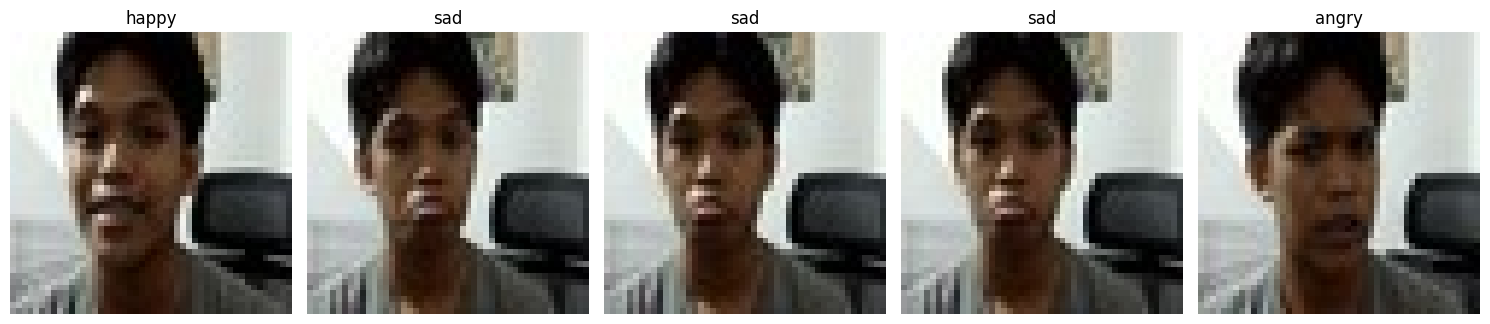

In [8]:
def display_random_images(images, labels, num_images=5):
    num_total_images = len(images)
    random_indices = np.random.choice(num_total_images, size=num_images, replace=False)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, idx in enumerate(random_indices):
        axes[i].imshow(images[idx])
        axes[i].set_title(labels[idx])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

display_random_images(data, labels)

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [10]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42 , stratify = labels)

In [12]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=4)  # Convert training labels to one-hot encoded format
y_test = to_categorical(y_test, num_classes=4) 

In [13]:
# normalize independent data 
x_train = x_train / 255.0
x_test = x_test / 255.0

## Image augmentation

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
strat = df['label']
train_df,validate_df = train_test_split(df,train_size = 0.80,shuffle = True, random_state = 42, stratify = strat)

In [16]:
batch_size = 64
img_size = (48,48)
channels = 3
img_shape = (img_size[0],img_size[1],channels)

# Create different ImageDataGenerator objects for training and testing/validation sets
train_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range = 0.1,   
    height_shift_range = 0.1,
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True)
valid_gen = ImageDataGenerator(rescale=1./255)


# Specify the directory argument for each set
train_gen = train_gen.flow_from_dataframe(dataframe = train_df, x_col = 'data' ,y_col = 'label', target_size = img_size, class_mode = 'categorical', color_mode= 'grayscale',
                                          shuffle = True, batch_size = batch_size)
validate_gen = valid_gen.flow_from_dataframe(dataframe = validate_df,x_col = 'data' ,y_col = 'label', target_size = img_size, class_mode = 'categorical', color_mode= 'grayscale',
                                          shuffle = True, batch_size = batch_size)

Found 320 validated image filenames belonging to 4 classes.
Found 80 validated image filenames belonging to 4 classes.


## Building CNN model

In [49]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf 

In [55]:
from keras import regularizers

model= Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))  # input layer with 32 filters of size 3 x 3 using relu activation function
model.add(Conv2D(64,(3,3), padding='same', activation='relu' )) # a 2nd convolutional layer with 64 filters
model.add(BatchNormalization()) # add a batch normalization layer
model.add(MaxPooling2D(pool_size=(2, 2))) # max pool with 2 x 2 size
model.add(Dropout(0.25))  # add a dropout layer with 25% rate

model.add(Conv2D(128,(5,5), padding='same', activation='relu')) # add a 3rd convlutional layer with 128 filters of 5 x 5 size
model.add(BatchNormalization()) # add a batch normalization layer
model.add(MaxPooling2D(pool_size=(2, 2))) # max pools again to 2x2 size
model.add(Dropout(0.25))  # add a dropout layer with 25% rate
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01))) # add a 4th convolutional layer with 512 filters of 3 x 3 size and a penalty factors of 1% to network layer
model.add(BatchNormalization()) # add a batch normalization layer
model.add(MaxPooling2D(pool_size=(2, 2))) # max pool of 2 x 2 size
model.add(Dropout(0.25))  # add a dropout with a rate of 25%

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01))) # add a 5th convolutional layer with 512 filters of 3 x 3 size and a penalty factors of 1% to network layer
model.add(BatchNormalization()) # add a batch normalization layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # add a dropout with a rate of 25%

model.add(Flatten()) # flatten the layer
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(4, activation='softmax'))

model.compile(
    optimizer = tf.keras.optimizers.Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [56]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_24 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 24, 24, 128)      

In [58]:
# Create a checkpoint for each increase in model's performance in case of internal error.
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath= 'model_weight.h5',    # where the weights will be stored
    monitor= 'val_accuracy',    # use val_accuracy as metrics in checking the performance
    save_best_only= True,   # only save the best weights
    save_weights_only= True,    
    mode= 'max',
    verbose= 1
)

# Fit the nodel
model_hist = model.fit(
    train_gen,
    steps_per_epoch = len(train_gen),
    epochs= 80,
    validation_data= validate_gen,
    validation_steps= len(validate_gen),
    callbacks= [checkpoint]
)

Epoch 1/80
5/5 [==============================] - ETA: 0s - loss: 7.6816 - accuracy: 0.7219
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to model_weight.h5
5/5 [==============================] - 2s 324ms/step - loss: 7.6816 - accuracy: 0.7219 - val_loss: 10.0232 - val_accuracy: 0.2500
Epoch 2/80
5/5 [==============================] - ETA: 0s - loss: 7.6381 - accuracy: 0.7563
Epoch 2: val_accuracy did not improve from 0.25000
5/5 [==============================] - 1s 254ms/step - loss: 7.6381 - accuracy: 0.7563 - val_loss: 10.2048 - val_accuracy: 0.2500
Epoch 3/80
5/5 [==============================] - ETA: 0s - loss: 7.6814 - accuracy: 0.7469
Epoch 3: val_accuracy did not improve from 0.25000
5/5 [==============================] - 1s 235ms/step - loss: 7.6814 - accuracy: 0.7469 - val_loss: 10.3881 - val_accuracy: 0.2500
Epoch 4/80
5/5 [==============================] - ETA: 0s - loss: 7.6008 - accuracy: 0.7469
Epoch 4: val_accuracy did not improve from 0.25000
5/5 

## Save model

In [59]:
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

## Load model

In [17]:
from keras.models import model_from_json
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [18]:
from keras_preprocessing.image import load_img

label = ['angry', 'confused', 'happy', 'sad']
def ef(image):
    img = load_img(image, grayscale=True)
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

## See model prediction

original image is of confused
1/1 [==============================] - 0s 26ms/step
model prediction is  confused


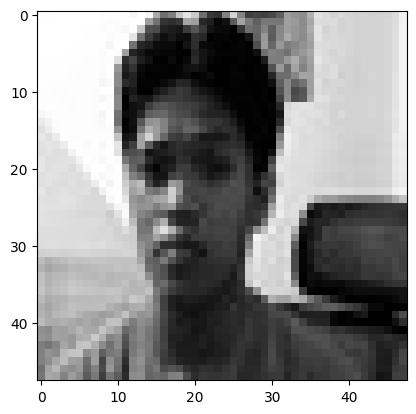

In [21]:
image = r'image_classes\train\confused\confused_35 resized.jpg'

print("original image is of confused")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

original image is of happy
1/1 [==============================] - 0s 24ms/step


model prediction is  happy


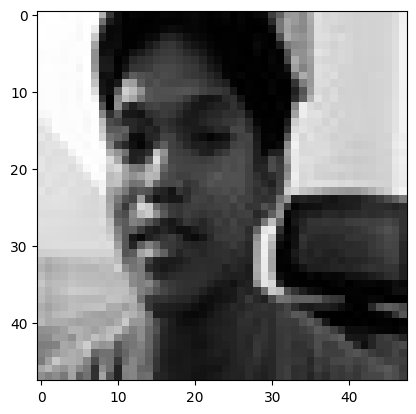

In [30]:

image = r'image_classes\train\happy\happy_99 resized.jpg'

print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

- A correct prediction from the model

## Test model prediction real time using OpenCV

In [79]:
import cv2
from keras.models import model_from_json
import numpy as np

# Load the pre-trained model architecture from JSON file
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

# Load the pre-trained model weights
model.load_weights("emotiondetector.h5")

# Load the Haar cascade classifier for face detection
haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

# Define a function to extract features from an image
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

# Open the webcam (camera)
webcam = cv2.VideoCapture(0)

# Define labels for emotion classes
labels = {0: 'angry', 1: 'confused', 2: 'happy', 3: 'sad'}

while True:
    # Read a frame from the webcam
    i, im = webcam.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(im, 1.3, 5)

    try:
        # For each detected face, perform facial emotion recognition
        for (p, q, r, s) in faces:
            # Extract the region of interest (ROI) which contains the face
            image = gray[q:q + s, p:p + r]

            # Draw a rectangle around the detected face
            cv2.rectangle(im, (p, q), (p + r, q + s), (255, 0, 0), 2)

            # Resize the face image to the required input size (48x48)
            image = cv2.resize(image, (48, 48))

            # Extract features from the resized face image
            img = extract_features(image)

            # Make a prediction using the trained model
            pred = model.predict(img)

            # Get the predicted label for emotion
            prediction_label = labels[pred.argmax()]

            # Display the predicted emotion label near the detected face
            cv2.putText(im, f'Emotion: {prediction_label}', (p - 10, q - 10),
                        cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 255))

        # Display the frame with annotations in real-time
        cv2.imshow("Real-time Facial Emotion Recognition", im)

        # Break the loop if the 'Esc' key is pressed
        if cv2.waitKey(1) == 27:
            break

    except cv2.error:
        pass

# Release the webcam and close all OpenCV windows
webcam.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 22ms/step
